DSCI 552: Homework #2

Michael Hanono

ID: 1426377592

In [ ]:
!pip install pandas
!pip install openpyxl
!pip install seaborn
!pip install numpy
!pip install -U scikit-learn
!pip install matplotlib
!pip install statsmodels

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math
from sklearn.preprocessing import PolynomialFeatures
from scipy import special
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import DistanceMetric
from sklearn.preprocessing import MinMaxScaler

(a) Download the Combined Cycle Power Plant data:

In [2]:
# Importing the data to a Pandas data frame
data = pd.read_excel('../data/Folds5x2_pp.xlsx')

# Show a sample of the data
print("Sample of data:")
data.head()

Sample of data:


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


(b) Exploring the data:

    i. How many rows are in this data set? How many columns? What do the rows and columns represent?

In [3]:
# Get number of rows and columns
numberOfRows = data.shape[0]
numberOfColumns = data.shape[1]

# Print number of rows and number of columns
print("Number of rows: " + str(numberOfRows))
print("Number of columns: " + str(numberOfColumns))

Number of rows: 9568
Number of columns: 5


    The rows represent the different observations that were made. The columns represent the independent variables (AT, V, AP, RH) and the dependent variable (PE).

    ii. Make pairwise scatterplots of all the variables in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

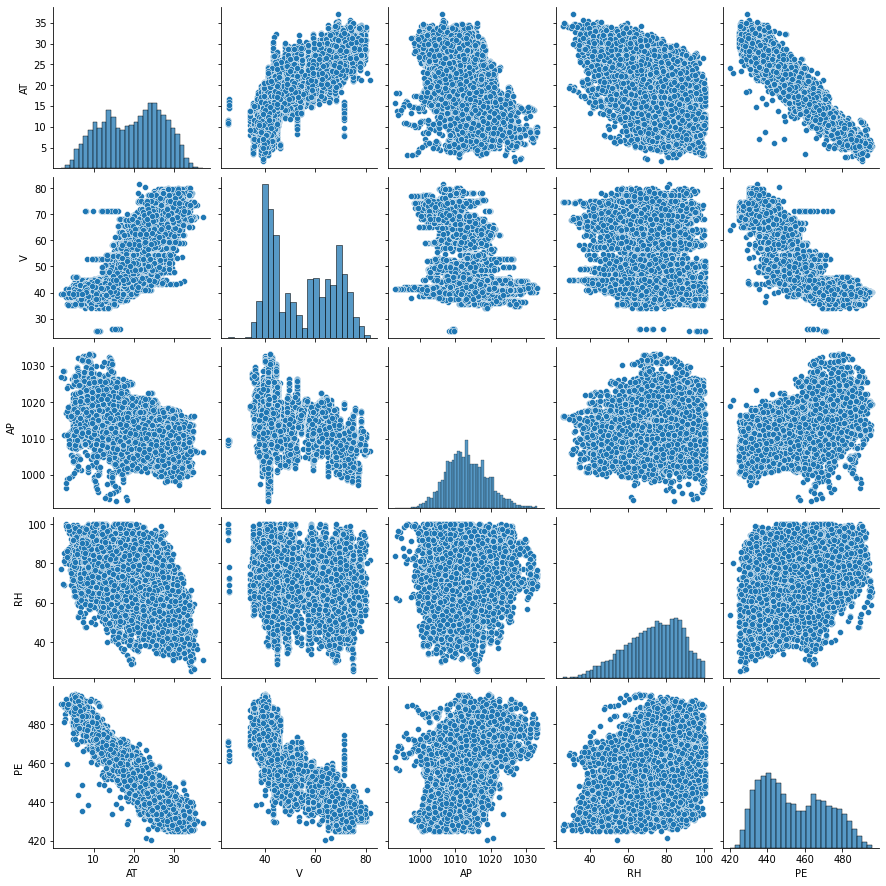

In [4]:
# Make pairwise scatter plots with all the variables including the dependent variable

sns.pairplot(data, dropna=True)

    Findings:
    When looking at the dependent variable (PE) we can see that there seems to be negative linear correlations between PE with AT and PE with V. We can interpret this as it being that as temperature adn exhaus vacuum increase, the net hourly electrical energy output decreases. It doesn't appear to be a strong relationship between PE with AP and PE with RH. This could mean that pressure and humidity may not correlate with the energy output. Since in nature, ambient pressure and humidity are often positively correlated in nature, it could be possible that the two variables would interact in similar ways with the dependent variable. 

    iii. What are the mean, the median, range, first and third quartiles, and in terquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [5]:
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [6]:
# Create a dictionary that will be populated with the values and converted into a data frame
summary = {}
summary['Variable'] =[] 
summary['Mean'] = []
summary['Median'] = []
summary['Range'] = []
summary['First Quartile'] = []
summary['Third Quartile'] = []
summary['Interquartile'] = []


# Iterate over the variables and populate the dictionary
for i in data.columns:
    
    column = data[i]
    
    # Variables
    summary['Variable'].append(i)
    
    # Mean
    summary['Mean'].append(column.mean())
    
    # Median
    summary['Median'].append(column.median())
    
    # Range
    summary['Range'].append((column.min(), column.max()))
    
    # First Quartile
    firstQuartile = np.quantile(column, 0.25)
    summary['First Quartile'].append(firstQuartile)
    
    #Third Quartile
    thirdQuartile = np.quantile(column, 0.75)
    summary['Third Quartile'].append(thirdQuartile)
    
    # Interquartile
    summary['Interquartile'].append(thirdQuartile - firstQuartile)

    
# Transform dictionary to data frame and show results
summaryTable = pd.DataFrame(summary).set_index('Variable')

print('Summary Table:')
summaryTable.head()

Summary Table:


,Mean,Median,Range,First Quartile,Third Quartile,Interquartile
Variable,,,,,,
AT,19.651231,20.345,"(1.81, 37.11)",13.5100,25.72,12.2100
V,54.305804,52.080,"(25.36, 81.56)",41.7400,66.54,24.8000
AP,1013.259078,1012.940,"(992.89, 1033.3)",1009.1000,1017.26,8.1600
RH,73.308978,74.975,"(25.56, 100.16)",63.3275,84.83,21.5025
PE,454.365009,451.550,"(420.26, 495.76)",439.7500,468.43,28.6800


(c) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response?Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

In [7]:
# Reference: https://realpython.com/linear-regression-in-python/
# For each predictor fit a simple linear regression model

# Create a list to store the univariate coefficients and the list of independent variables
univariateCoefficients = []
independentVariables = data.drop(columns=["PE"])

# Get data for y that will be used in all the models
y = np.array(data['PE'])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        02:12:32   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

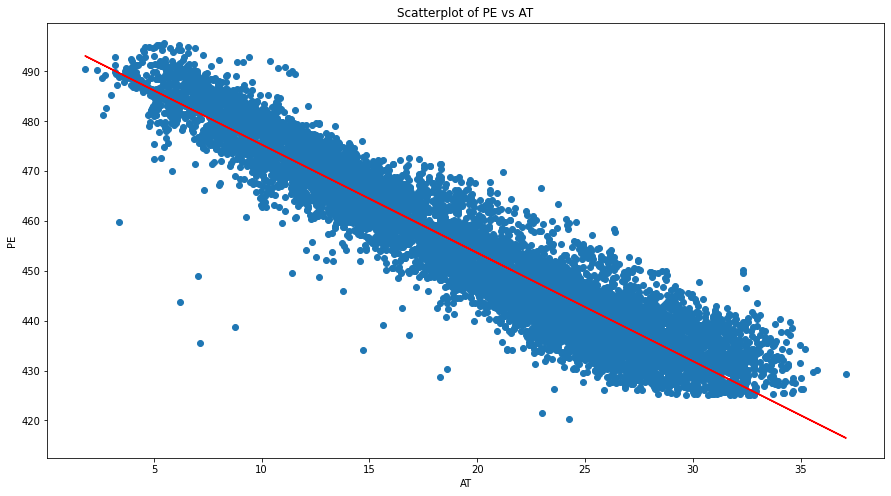

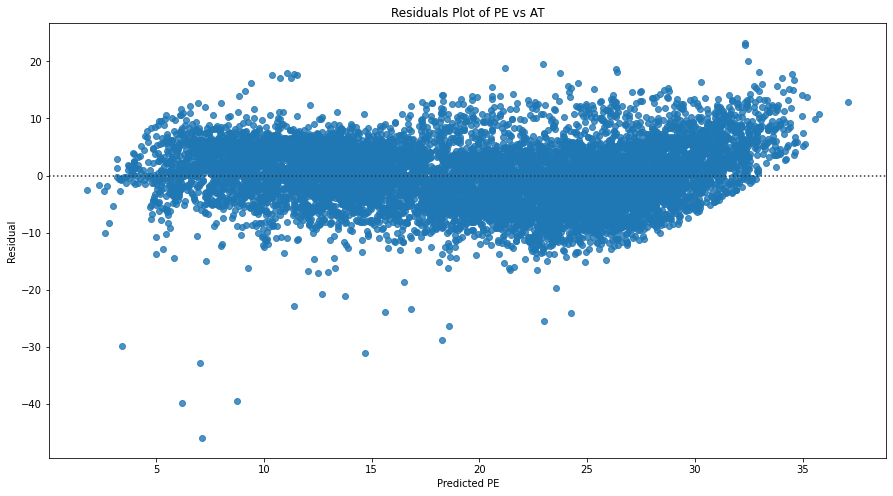

In [8]:
# Get data that will be used in features
X = np.array(data['AT']).reshape((-1, 1))

# Fit the simple linear regression model and predict the responses
lm = LinearRegression().fit(X, y)
prediction = lm.predict(X)

# Do a scatter plot of X and y and show it
plt.figure(figsize=(15, 8))
plt.scatter(X, y)
plt.plot(X, prediction, c='red')
plt.title('Scatterplot of PE vs AT')
plt.ylabel('PE')
plt.xlabel('AT')
plt.show

# Do a residuals error plot to identify the outliers
resid = plt.figure(figsize=(15, 8))
sns.residplot(x=X, y=y)
plt.title('Residuals Plot of PE vs AT')
plt.ylabel('Residual')
plt.xlabel('Predicted PE')
plt.show

# Print the summary and results from the model 
headersX = sm.add_constant(X)
model = sm.OLS(y, headersX)
result = model.fit()
print(result.summary())

# Store the univariate coefficient into the list (it will be used in 1E)
univariateCoefficients.append(result.params[1])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        02:12:33   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.0

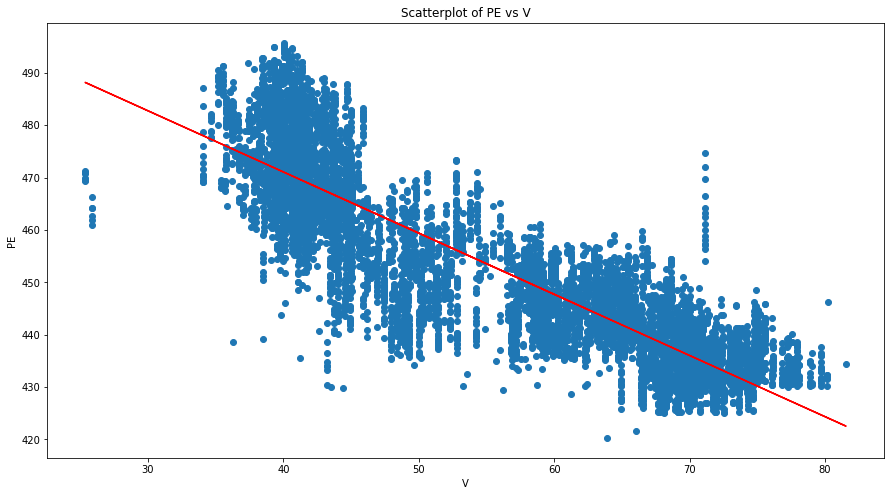

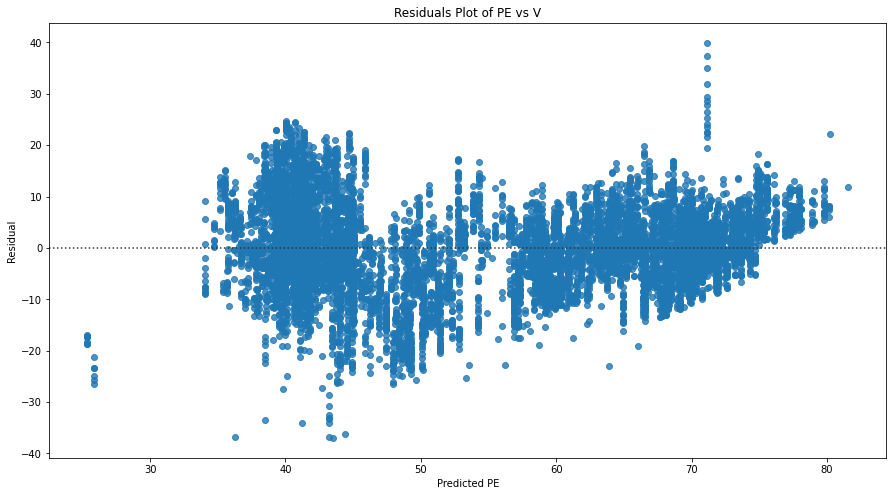

In [9]:
# Get data that will be used in features
X = np.array(data['V']).reshape((-1, 1))

# Fit the simple linear regression model and predict the responses
lm = LinearRegression().fit(X, y)
prediction = lm.predict(X)
    
# Do a scatter plot of X and y and show it
plt.figure(figsize=(15, 8))
plt.scatter(X, y)
plt.plot(X, prediction, c='red')
plt.title('Scatterplot of PE vs V')
plt.ylabel('PE')
plt.xlabel('V')
plt.show

# Do a residuals error plot to identify the outliers
resid = plt.figure(figsize=(15, 8))
sns.residplot(x=X, y=y)
plt.title('Residuals Plot of PE vs V')
plt.ylabel('Residual')
plt.xlabel('Predicted PE')
plt.show

# Print the summary and results from the model 
headersX = sm.add_constant(X)
model = sm.OLS(y, headersX)
result = model.fit()
print(result.summary())

# Store the univariate coefficient into the list (it will be used in 1E)
univariateCoefficients.append(result.params[1])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        02:12:33   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.0

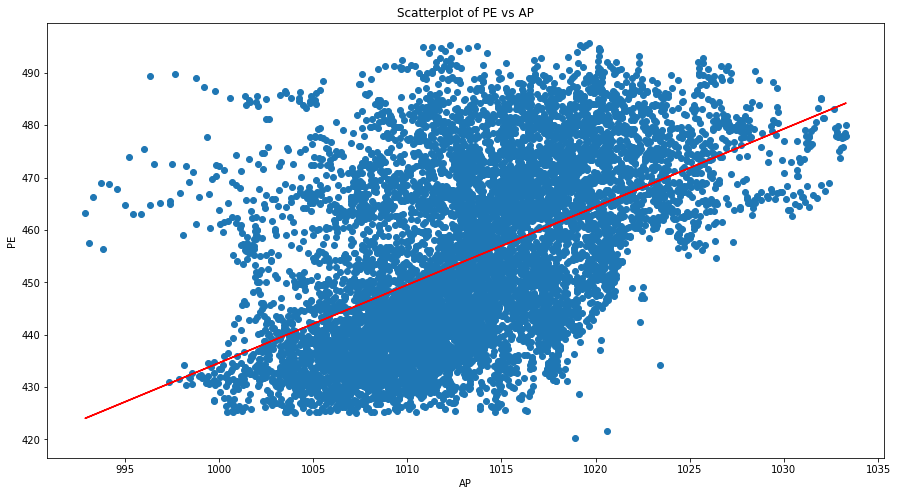

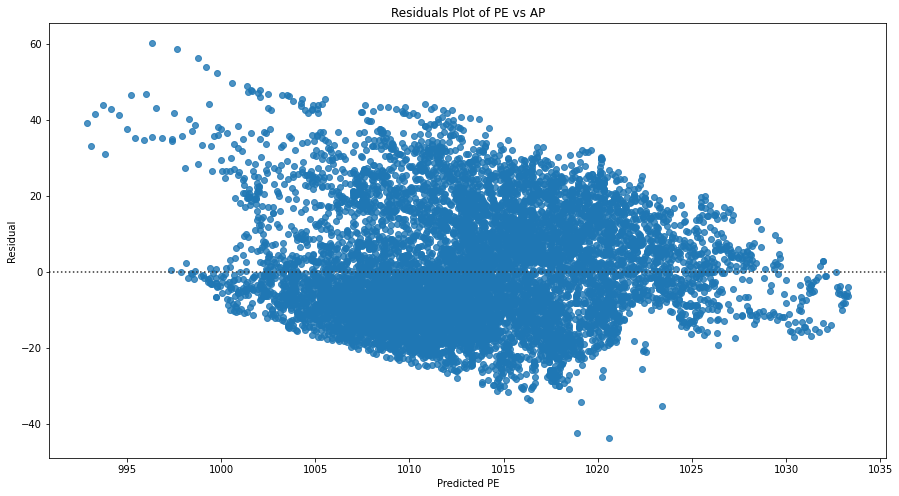

In [10]:
# Get data that will be used in features
X = np.array(data['AP']).reshape((-1, 1))

# Fit the simple linear regression model and predict the responses
lm = LinearRegression().fit(X, y)
prediction = lm.predict(X)

# Do a scatter plot of X and y and show it
plt.figure(figsize=(15, 8))
plt.scatter(X, y)
plt.plot(X, prediction, c='red')
plt.title('Scatterplot of PE vs AP')
plt.ylabel('PE')
plt.xlabel('AP')
plt.show

# Do a residuals error plot to identify the outliers
resid = plt.figure(figsize=(15, 8))
sns.residplot(x=X, y=y)
plt.title('Residuals Plot of PE vs AP')
plt.ylabel('Residual')
plt.xlabel('Predicted PE')
plt.show

# Print the summary and results from the model 
headersX = sm.add_constant(X)
model = sm.OLS(y, headersX)
result = model.fit()
print(result.summary())

# Store the univariate coefficient into the list (it will be used in 1E)
univariateCoefficients.append(result.params[1])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        02:12:34   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.0

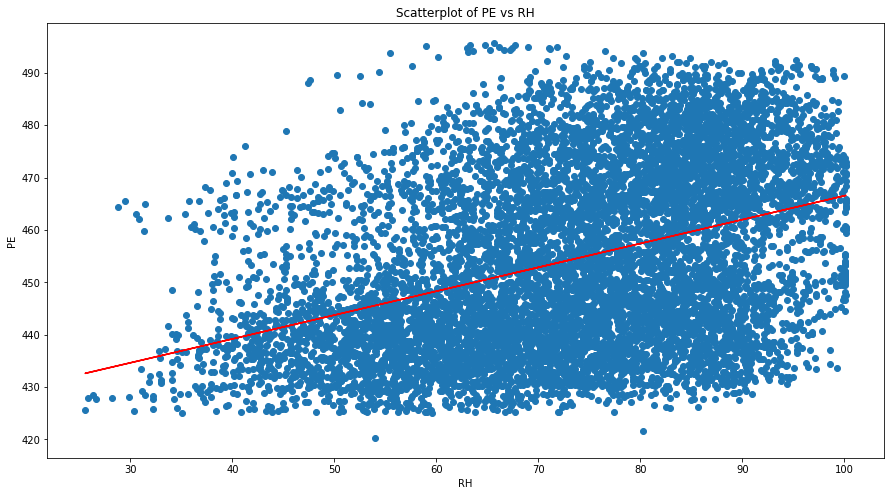

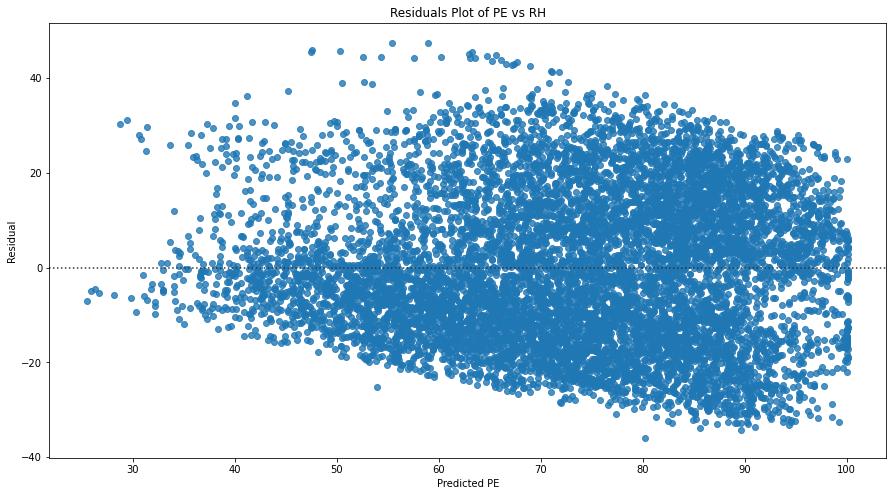

In [11]:
# Get data that will be used in features
X = np.array(data['RH']).reshape((-1, 1))

# Fit the simple linear regression model and predict the responses
lm = LinearRegression().fit(X, y)
prediction = lm.predict(X)

# Do a scatter plot of X and y and show it
plt.figure(figsize=(15, 8))
plt.scatter(X, y)
plt.plot(X, prediction, c='red')
plt.title('Scatterplot of PE vs RH')
plt.ylabel('PE')
plt.xlabel('RH')
plt.show

# Do a residuals error plot to identify the outliers
resid = plt.figure(figsize=(15, 8))
sns.residplot(x=X, y=y)
plt.title('Residuals Plot of PE vs RH')
plt.ylabel('Residual')
plt.xlabel('Predicted PE')
plt.show

# Print the summary and results from the model 
headersX = sm.add_constant(X)
model = sm.OLS(y, headersX)
result = model.fit()
print(result.summary())

# Store the univariate coefficient into the list (it will be used in 1E)
univariateCoefficients.append(result.params[1])

- AT vs PE: The predictor is statistically significant and negatively correlated to PE because its coefficient is -2.1. Since we have an R-Squared value of 0.89 we know that there is a strong correlation and the P-Value of ~0.0 shows the statistically significant association. We can see some outliers in the residual plot. These are the ones that are highlighted in red and have a large residual error.
- V vs PE: The predictor is statistically significant and negatively correlated to PE becuase its coefficient is -1.16. Since we have an R-Squared value of 0.757 we know that there is a strong correlation and the P-Value of ~0.0 shows the statistically significant association. We can see some outliers in the residual plot. These are the ones that are around the values of PE=25 and PE=70. There is also a group of outliers that is near PE=45.
- AP vs PE: The predictor is statistically significant and positively correlated to PE because its coefficient is 1.48. The R-Squared value of 0.26 means that there is a weak positive correlation between the variables. The residual plot shows that there are outliers where PE=995 and their residual erorr is large (top left). Also, there are some data points who's PE=1020 and their residual error is less than -25. These are also outliers. 
- RH vs PE: We can see that there is a statistically significant association between the predictor and the dependent variable because it has a P-Value of ~0.0. The R-Squared value is pretty small (0.15) and we can conclude that the correlation is very weak. We can see that in the residual plot there are some outliers with residual erorrs around 40. 

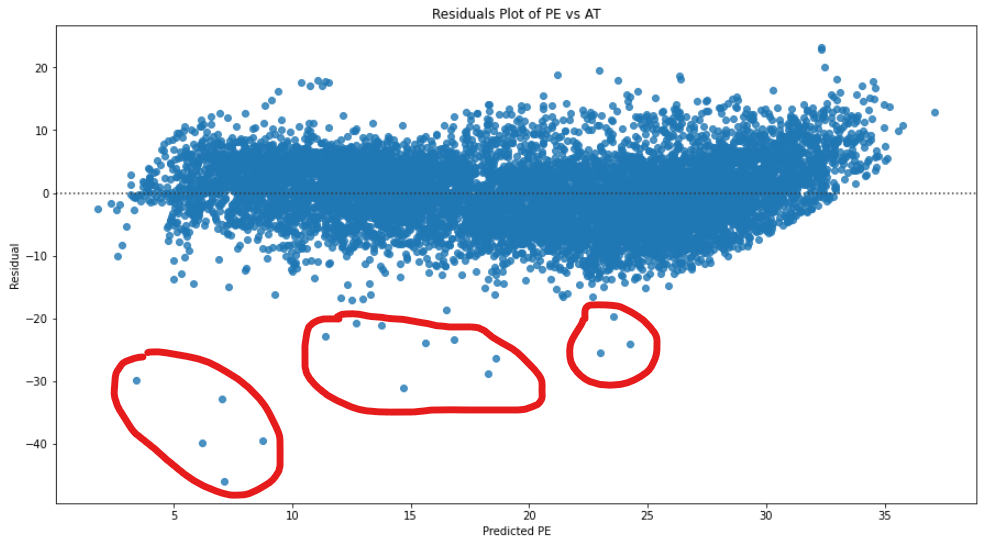

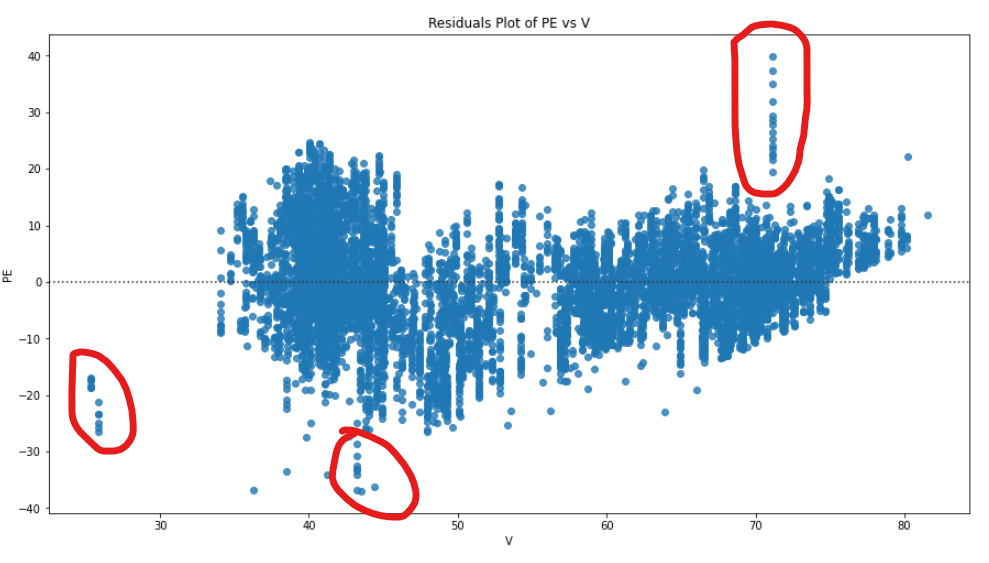

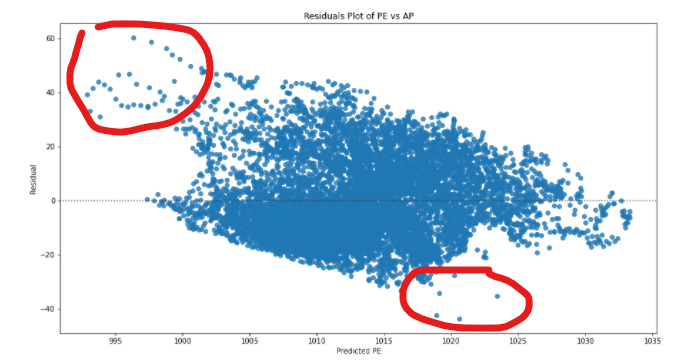

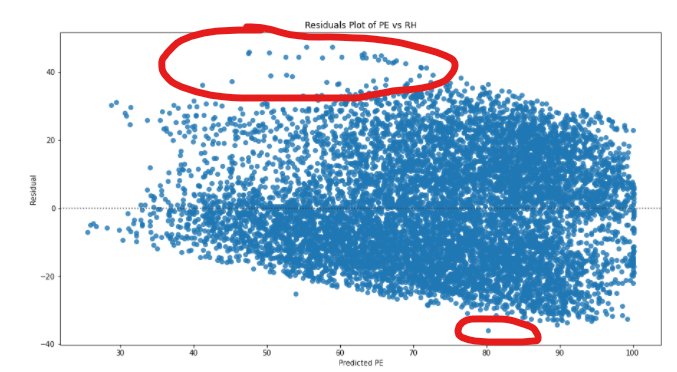

(d) Fit a multiple regression model to predict the response using all of the predictors.
Describe your results. For which predictors can we reject the null hypothesis
H0 : βj = 0?

In [12]:
# Create a list to store the multiple coefficients
multipleCoefficients = []

# X and y to train and predict the model
X = data.drop(columns=['PE'])
y = data['PE']

# Create and fit the model
mulit_lm = LinearRegression().fit(X, y)

# Get results for the model 
headersX = sm.add_constant(X)
model = sm.OLS(y, headersX)
results = model.fit()
print(results.summary())

# Store the regression coefficients for 1E
for coef in results.params:
    multipleCoefficients.append(coef)

# Store the coefficients on a list
multipleCoefficients = multipleCoefficients[1:]

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        02:12:35   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Since the F-Statistic for each of the variables is significantly large, we can reject the null hypothesis for al predictors. This means that all of them are statistically significant.

(e) How do your results from 1c compare to your results from 1d? Create a plot
displaying the univariate regression coefficients from 1c on the x-axis, and the
multiple regression coefficients from 1d on the y-axis. That is, each predictor is
displayed as a single point in the plot. Its coefficient in a simple linear regression
model is shown on the x-axis, and its coefficient estimate in the multiple linear
regression model is shown on the y-axis.


Chart:


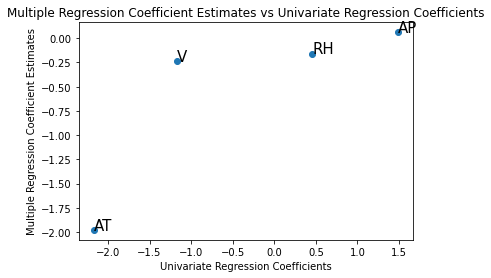

In [13]:
# Plot of univariate regression coefficients and multiple regression coefficients. 
# Plot list with coefficients from previous models
plt.scatter(univariateCoefficients, multipleCoefficients)
plt.xlabel('Univariate Regression Coefficients')
plt.ylabel('Multiple Regression Coefficient Estimates')
plt.title("Multiple Regression Coefficient Estimates vs Univariate Regression Coefficients")

# Add the labels to the data points
labels = list(data.drop(columns=["PE"]).columns)
for i, label in enumerate(labels):
    plt.annotate(label, (univariateCoefficients[i], multipleCoefficients[i]), fontsize=15)
    
print('Chart:')    

(f) Is there evidence of nonlinear association between any of the predictors and the
response? To answer this question, for each predictor X, fit a model of the form2
Y = β0 + β1X + β2X^2 + β3X^3 + E

In [14]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
y = data["PE"]

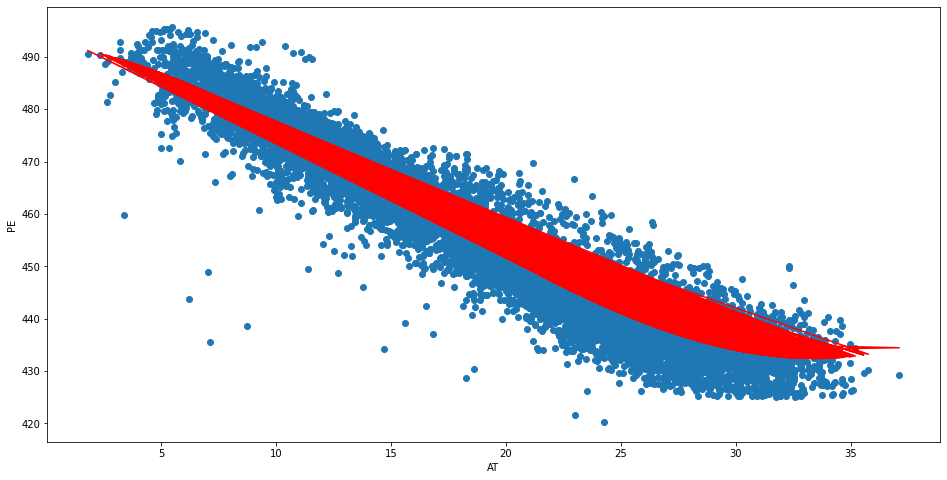

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        02:12:37   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

In [15]:
# Get data to use for the polynomial features regression model 
X = data['AT']
X = np.array(X).reshape((-1, 1))
polynomials = PolynomialFeatures(3)
polyX = polynomials.fit_transform(X)

# Create model with polynomial features and print plot
polynomialRegression = LinearRegression()
polynomialRegression.fit(polyX, y)
plt.figure(figsize=(16, 8))
plt.scatter(X, y)
plt.plot(X, polynomialRegression.predict((polynomials.fit_transform(X))), color='red')
plt.xlabel('AT')
plt.ylabel("PE")
plt.show()

# Print the result of the model with polynomial features
headersX = sm.add_constant(polyX)
model = sm.OLS(y, polyX)
polyResults = model.fit()
print(polyResults.summary())

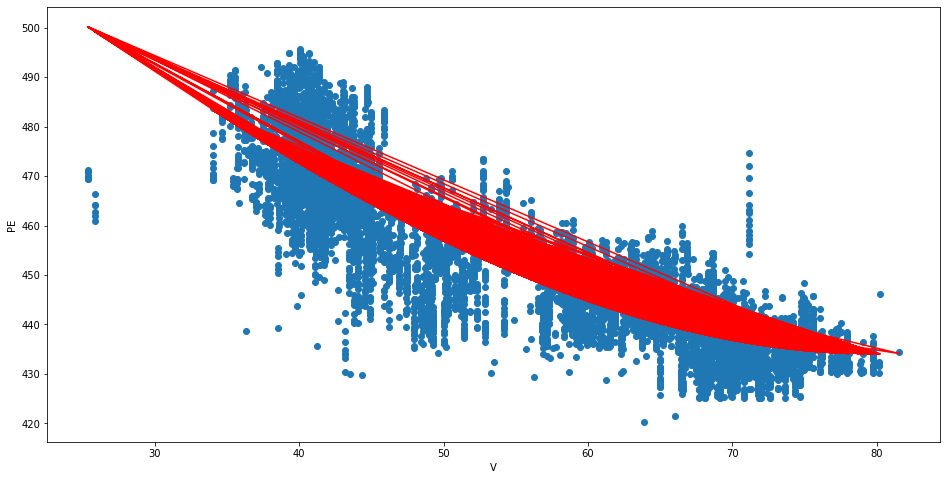

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        02:12:38   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.0

In [16]:
# Get data to use for the polynomial features regression model 
X = data['V']
X = np.array(X).reshape((-1, 1))
polynomials = PolynomialFeatures(3)
polyX = polynomials.fit_transform(X)

# Create model with polynomial features and print plot
polynomialRegression = LinearRegression()
polynomialRegression.fit(polyX, y)
plt.figure(figsize=(16, 8))
plt.scatter(X, y)
plt.plot(X, polynomialRegression.predict((polynomials.fit_transform(X))), color='red')
plt.xlabel('V')
plt.ylabel("PE")
plt.show()

# Print the result of the model with polynomial features
headersX = sm.add_constant(polyX)
model = sm.OLS(y, polyX)
polyResults = model.fit()
print(polyResults.summary())

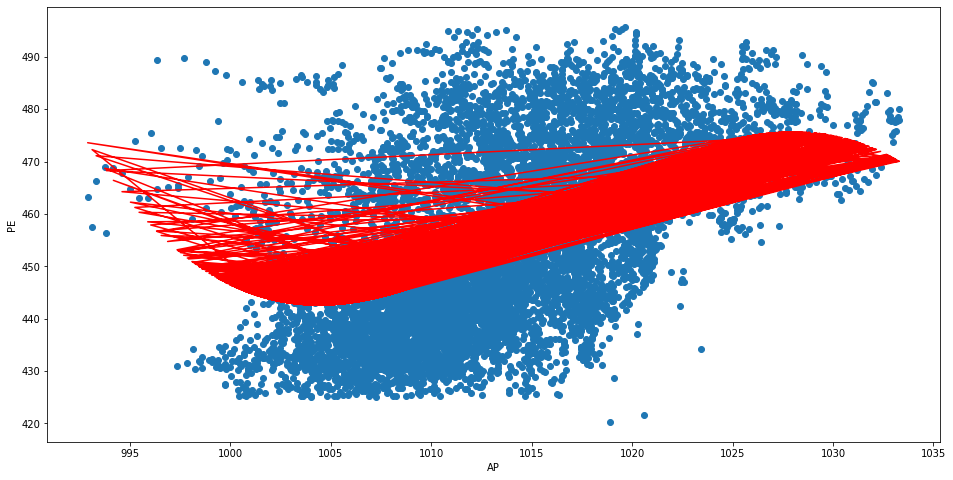

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        02:12:38   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.0

In [17]:
# Get data to use for the polynomial features regression model 
X = data['AP']
X = np.array(X).reshape((-1, 1))
polynomials = PolynomialFeatures(3)
polyX = polynomials.fit_transform(X)

# Create model with polynomial features and print plot
polynomialRegression = LinearRegression()
polynomialRegression.fit(polyX, y)
plt.figure(figsize=(16, 8))
plt.scatter(X, y)
plt.plot(X, polynomialRegression.predict((polynomials.fit_transform(X))), color='red')
plt.xlabel('AP')
plt.ylabel("PE")
plt.show()

# Print the result of the model with polynomial features
headersX = sm.add_constant(polyX)
model = sm.OLS(y, polyX)
polyResults = model.fit()
print(polyResults.summary())

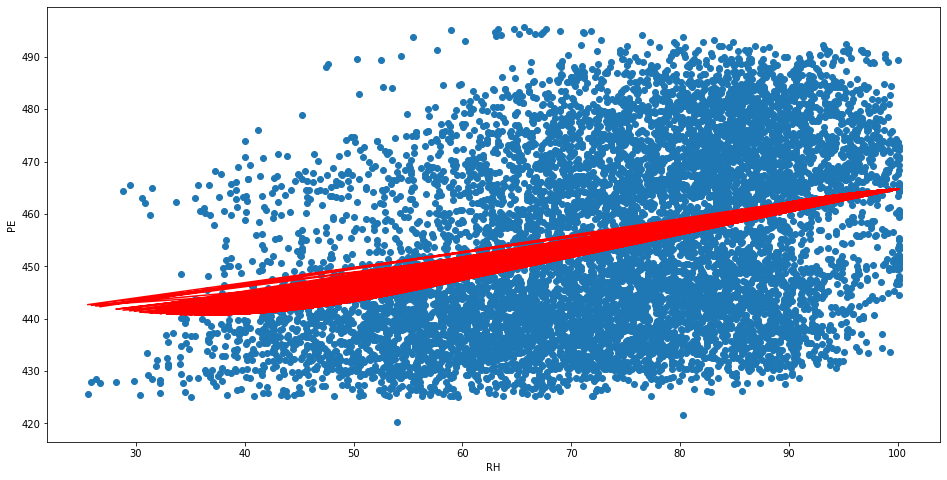

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        02:12:39   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.0

In [18]:
# Get data to use for the polynomial features regression model 
X = data['RH']
X = np.array(X).reshape((-1, 1))
polynomials = PolynomialFeatures(3)
polyX = polynomials.fit_transform(X)

# Create model with polynomial features and print plot
polynomialRegression = LinearRegression()
polynomialRegression.fit(polyX, y)
plt.figure(figsize=(16, 8))
plt.scatter(X, y)
plt.plot(X, polynomialRegression.predict((polynomials.fit_transform(X))), color='red')
plt.xlabel('RH')
plt.ylabel("PE")
plt.show()

# Print the result of the model with polynomial features
headersX = sm.add_constant(polyX)
model = sm.OLS(y, polyX)
polyResults = model.fit()
print(polyResults.summary())

By looking at the R-Squared values from the models, we can see that there is evidence of strong correlations of the non-lienar models for AT and V (R-Squared values greater than 0.5). However, there is also evidence of a weak correlation with AP and RH since thier R-Squared values are pretty low. In addition, the P-Values for all the models are 0. This means that there is statistically significance.

(g) Is there evidence of association of interactions of predictors with the response? To
answer this question, run a full linear regression model with all pairwise interaction
terms and state whether any interaction terms are statistically significant.


In [19]:
# Define the data that will be used for the model
X = data.drop(columns=['PE'])
y = data['PE']

# Fit the model to X and y
headersX = sm.add_constant(X)

# Create the interaction polynomials 
interactionPolynomials = PolynomialFeatures(interaction_only=True)
transformX = interactionPolynomials.fit_transform(headersX)
finalX = pd.concat(([headersX, pd.DataFrame(transformX, columns=interactionPolynomials.get_feature_names()).drop(['1','x0','x1','x2','x3','x4', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4'], 1)]),1)
finalX =  finalX.rename(columns={'x1 x2':'ATxV', 'x1 x3':'ATxAP', 'x1 x4':'ATxRH', 'x2 x3':'VxAP', 'x2 x4':'VxRH', 'x3 x4':'APxRH'})

# Get model results and print them
model = sm.OLS(y, finalX)
result = model.fit()
result.summary()

C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\mhano\AppData\Local\Temp/ipykernel_12928/1352384985.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  finalX = pd.concat(([headersX, pd.DataFrame(transformX, columns=interactionPolynomials.get_feature_names()).drop(['1','x0','x1','x2','x3','x4', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4'], 1)]),1)
C:\Users\mhano\AppData\Local\Temp/ipykernel_12928/1352384985.py:11: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  finalX = pd.concat(([headersX, pd.DataFrame(transformX, columns=interactionPolynomials.get_featur

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        02:12:39   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.000     531.631     839.934
AT            -4.3470      2.373     -1.832      0.067      -8.999       0.305
V             -7.6749      1.351     -5.682      0.000     -10.323      -5.027
AP            -0.1524      0.077     -1.983      0.047      -0.303      -0.002
RH             1.5709      0.773      2.031      0.042       0.055       3.087
ATxV           0.0210      0.001     23.338      0.000       0.019       0.023
ATxAP          0.0018      0.002      0.752      0.452      -0.003       0.006
ATxRH         -0.0052      0.001     -6.444      0.000      -0.007      -0.004
VxAP           0.0068      0.001      5.135      0.000       0.004       0.009
VxRH           0.0008      0.000      1.716      0.086      -0.000       0.002
APxRH         -0.0016      0.001     -2.125      0.034      -0.003      -0.000
==============================================================================
Omnibus:                     1454.609   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9170.848
Skew:                          -0.574   Prob(JB):                         0.00
Kurtosis:                       7.657   Cond. No.                     1.70e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The interaction terms ATxV, ATxRH, VxAP, and APxRH are statistically significant with P-values less than 0.05 (0, 0, 0.034 respectively). However, the interaction terms VxRH and ATxAP were statistically insignificant with a P-value of 0.086 and 0.452 respectively.

In [20]:
# Define the data that will be used for the model
X = data.drop(columns=['PE'])
y = data['PE']

# Fit the model to X and y
headersX = sm.add_constant(X)

# Create the interaction polynomials  and remove the statistically insignificant terms
interactionPolynomials = PolynomialFeatures(interaction_only=True)
transformX = interactionPolynomials.fit_transform(headersX)
finalX = pd.concat(([headersX, pd.DataFrame(transformX, columns=interactionPolynomials.get_feature_names()).drop(['1','x0','x1','x2','x3','x4', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x2 x4', 'x1 x3'], 1)]),1)
finalX =  finalX.rename(columns={'x1 x2':'ATxV', 'x1 x4':'ATxRH', 'x2 x3':'VxAP', 'x3 x4':'APxRH'})

# Get model results and print them
model = sm.OLS(y, finalX)
result = model.fit()
result.summary()

C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\mhano\AppData\Local\Temp/ipykernel_12928/3408717773.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  finalX = pd.concat(([headersX, pd.DataFrame(transformX, columns=interactionPolynomials.get_feature_names()).drop(['1','x0','x1','x2','x3','x4', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x2 x4', 'x1 x3'], 1)]),1)
C:\Users\mhano\AppData\Local\Temp/ipykernel_12928/3408717773.py:11: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  finalX = pd.concat(([headersX, pd.DataFrame(transformX, columns=interactionPoly

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.756e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        02:12:40   Log-Likelihood:                -27550.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9559   BIC:                         5.518e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        660.8593     76.262      8.666      0.000     511.370     810.349
AT            -2.6146      0.071    -36.860      0.000      -2.754      -2.476
V             -8.1375      0.826     -9.850      0.000      -9.757      -6.518
AP            -0.1301      0.075     -1.743      0.081      -0.276       0.016
RH             1.8712      0.663      2.824      0.005       0.572       3.170
ATxV           0.0204      0.001     24.117      0.000       0.019       0.022
ATxRH         -0.0042      0.001     -7.807      0.000      -0.005      -0.003
VxAP           0.0073      0.001      9.097      0.000       0.006       0.009
APxRH         -0.0019      0.001     -2.902      0.004      -0.003      -0.001
==============================================================================
Omnibus:                     1448.090   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9091.380
Skew:                          -0.572   Prob(JB):                         0.00
Kurtosis:                       7.636   Cond. No.                     1.61e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We saw in the first model that the interaction term VxRH was insignificant. When taking out that term from the model and run it, we get that the term ATxAP is also statistically insignificant. When we take those two terms out we get a more optimal moel wehre all of the interaction terms are statistically significant and less computation operations. 

(h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a
randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities,
and remove insignificant variables using p-values (be careful about interaction
terms). Test both models on the remaining points and report your train and test
MSEs.


In [108]:
# Get data for model
X = data.drop(columns=['PE'])
y = data['PE']

# Randomly separate train and test set (70% subset of data with all predictors)
np.random.seed(0)
trainingX, testingX, trainingY, testingY = train_test_split(X, y, test_size=0.3, random_state=0)
X = trainingX
y = trainingY

In [109]:
# Training the model with the features AT, V, AP, RH
trainingHeadersX = sm.add_constant(X)
simpleModel = sm.OLS(y, trainingHeadersX)
result = simpleModel.fit()
result.summary()

C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.155e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:33:27   Log-Likelihood:                -19688.
No. Observations:                6697   AIC:                         3.939e+04
Df Residuals:                    6692   BIC:                         3.942e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        448.5613     11.745     38.192      0.000     425.537     471.585
AT            -1.9643      0.018   -106.695      0.000      -2.000      -1.928
V             -0.2401      0.009    -27.459      0.000      -0.257      -0.223
AP             0.0680      0.011      5.968      0.000       0.046       0.090
RH            -0.1565      0.005    -31.327      0.000      -0.166      -0.147
==============================================================================
Omnibus:                      808.731   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4369.490
Skew:                          -0.454   Prob(JB):                         0.00
Kurtosis:                       6.851   Cond. No.                     2.14e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
# Get the training and testing MSE

# Train MSE
trainingPrediction = result.predict(trainingHeadersX)
trainingMSE = mean_squared_error(y, trainingPrediction)
print('Training MSE: ' + str(trainingMSE))

# Testing MSE
testingHeadersX = sm.add_constant(testingX)
testingPrediction = result.predict(testingHeadersX)
testingMSE = mean_squared_error(testingY, testingPrediction)
print('Testing MSE: ' + str(testingMSE))

Training MSE: 20.941563616739593
Testing MSE: 20.36838300288591


C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [112]:
# Fit the model to X and y
headersX = sm.add_constant(X)
y.reset_index(drop=True, inplace=True)

# Create the interaction polynomials 
interactionPolynomials = PolynomialFeatures(interaction_only=False)
transformX = interactionPolynomials.fit_transform(headersX)
terms = pd.DataFrame(transformX, columns=interactionPolynomials.get_feature_names()).drop(['1','x0','x1','x2','x3','x4', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0^2'], 1)
headersX.reset_index(drop=True, inplace=True)
finalX = pd.concat([headersX, terms], 1)
finalX =  finalX.rename(columns={'x1 x2':'ATxV', 'x1 x3':'ATxAP', 'x1 x4':'ATxRH', 'x2 x3':'VxAP', 'x2 x4':'VxRH', 'x3 x4':'APxRH', 'x1^2':'AT^2', 'x2^2':'V^2', 'x3^2':'AP^2', 'x4^2':'RH^2'})

# Get model results and print them
model = sm.OLS(y, finalX)
result = model.fit()
result.summary()

C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\mhano\AppData\Local\Temp/ipykernel_12928/1850690056.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  terms = pd.DataFrame(transformX, columns=interactionPolynomials.get_feature_names()).drop(['1','x0','x1','x2','x3','x4', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0^2'], 1)
C:\Users\mhano\AppData\Local\Temp/ipykernel_12928/1850690056.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  finalX = pd.concat([headersX, terms], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     7075.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:33:38   Log-Likelihood:                -19248.
No. Observations:                6697   AIC:                         3.853e+04
Df Residuals:                    6682   BIC:                         3.863e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7073.1567   1505.522     -4.698      0.000      -1e+04   -4121.854
AT            -6.3067      3.826     -1.648      0.099     -13.807       1.194
V             -2.7832      1.818     -1.531      0.126      -6.347       0.780
AP            14.8033      2.916      5.076      0.000       9.086      20.521
RH             3.3825      1.086      3.114      0.002       1.253       5.512
AT^2           0.0168      0.004      4.482      0.000       0.009       0.024
ATxV           0.0103      0.003      3.174      0.002       0.004       0.017
ATxAP          0.0037      0.004      0.997      0.319      -0.004       0.011
ATxRH         -0.0061      0.002     -3.305      0.001      -0.010      -0.002
V^2           -0.0005      0.001     -0.551      0.581      -0.002       0.001
VxAP           0.0023      0.002      1.290      0.197      -0.001       0.006
VxRH           0.0003      0.001      0.340      0.734      -0.001       0.002
AP^2          -0.0072      0.001     -5.108      0.000      -0.010      -0.004
APxRH         -0.0031      0.001     -2.934      0.003      -0.005      -0.001
RH^2          -0.0019      0.000     -5.901      0.000      -0.003      -0.001
==============================================================================
Omnibus:                     1415.014   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12113.210
Skew:                          -0.770   Prob(JB):                         0.00
Kurtosis:                       9.406   Cond. No.                     2.96e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
# Get the training and testing MSE

# Train MSE
trainingPrediction = result.predict(finalX)
trainingMSE = mean_squared_error(y, trainingPrediction)
print('Training MSE: ' + str(trainingMSE))

# Testing MSE
headersTestingX = sm.add_constant(testingX)
testingY.reset_index(drop=True, inplace=True)
interactionPolynomials = PolynomialFeatures(interaction_only=False)
transformTestingX = interactionPolynomials.fit_transform(headersTestingX)
terms = pd.DataFrame(transformTestingX, columns=interactionPolynomials.get_feature_names()).drop(['1','x0','x1','x2','x3','x4', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0^2'], 1)
headersTestingX.reset_index(drop=True, inplace=True)
finalTestingX = pd.concat([headersTestingX, terms], 1)
finalTestingX =  finalTestingX.rename(columns={'x1 x2':'ATxV', 'x1 x3':'ATxAP', 'x1 x4':'ATxRH', 'x2 x3':'VxAP', 'x2 x4':'VxRH', 'x3 x4':'APxRH', 'x1^2':'AT^2', 'x2^2':'V^2', 'x3^2':'AP^2', 'x4^2':'RH^2'})
testingHeadersX = sm.add_constant(finalTestingX)
testingPrediction = result.predict(testingHeadersX)
testingMSE = mean_squared_error(testingY, testingPrediction)
print('Testing MSE: ' + str(testingMSE))

Training MSE: 18.366012211970716
Testing MSE: 17.52016099746141


C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\mhano\AppData\Local\Temp/ipykernel_12928/1402195033.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  terms = pd.DataFrame(transformTestingX, columns=interactionPolynomials.get_feature_names()).drop(['1','x0','x1','x2','x3','x4', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0^2'], 1)
C:\Users\mhano\AppData\Local\Temp/ipykernel_12928/1402195033.py:16: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  finalTestingX = pd.concat([headersTestingX, terms], 1)
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFou

We can see from the initial model with the predictors that the R-Squared value is 0.928 with no statistically insignificant terms. If we look at the model that has all of the interaction terms and polynomial terms, we see that it has a higher R-Squared value of 0.937 and has 4 statistically insignificant terms (ATxAP, V^2, VxAP, VxRH). 

In [25]:
# Fit the model to X and y
headersX = sm.add_constant(X)
y.reset_index(drop=True, inplace=True)

# Create the interaction polynomials and remove the statistically insignificant terms
interactionPolynomials = PolynomialFeatures(interaction_only=False)
transformX = interactionPolynomials.fit_transform(headersX)
terms = pd.DataFrame(transformX, columns=interactionPolynomials.get_feature_names()).drop(['1','x0','x1','x2','x3','x4', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0^2', 'x1 x3', 'x2^2', 'x2 x3', 'x2 x4'], 1)
headersX.reset_index(drop=True, inplace=True)
finalX = pd.concat([headersX, terms], 1)

finalX =  finalX.rename(columns={'x1 x2':'ATxV', 'x1 x4':'ATxRH', 'x3 x4':'APxRH', 'x1^2':'AT^2', 'x3^2':'AP^2', 'x4^2':'RH^2'})

# Get model results and print them
model = sm.OLS(y, finalX)
result = model.fit()
result.summary()

C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\mhano\AppData\Local\Temp/ipykernel_12928/3561949080.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  terms = pd.DataFrame(transformX, columns=interactionPolynomials.get_feature_names()).drop(['1','x0','x1','x2','x3','x4', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0^2', 'x1 x3', 'x2^2', 'x2 x3', 'x2 x4'], 1)
C:\Users\mhano\AppData\Local\Temp/ipykernel_12928/3561949080.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  finalX = pd.concat([headersX, terms], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     9892.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        02:12:47   Log-Likelihood:                -19255.
No. Observations:                6697   AIC:                         3.853e+04
Df Residuals:                    6686   BIC:                         3.861e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.001e+04   1121.577     -8.921      0.000   -1.22e+04   -7807.468
AT            -2.3374      0.102    -23.013      0.000      -2.537      -2.138
V             -0.4573      0.032    -14.354      0.000      -0.520      -0.395
AP            20.2770      2.216      9.150      0.000      15.933      24.621
RH             5.1379      0.784      6.552      0.000       3.601       6.675
AT^2           0.0164      0.002      7.184      0.000       0.012       0.021
ATxV           0.0077      0.001      5.283      0.000       0.005       0.011
ATxRH         -0.0071      0.001     -8.010      0.000      -0.009      -0.005
AP^2          -0.0098      0.001     -8.922      0.000      -0.012      -0.008
APxRH         -0.0048      0.001     -6.281      0.000      -0.006      -0.003
RH^2          -0.0020      0.000     -7.271      0.000      -0.003      -0.001
==============================================================================
Omnibus:                     1410.695   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11779.233
Skew:                          -0.774   Prob(JB):                         0.00
Kurtosis:                       9.310   Cond. No.                     2.20e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
# Get the training and testing MSE

# Train MSE
trainingPrediction = result.predict(finalX)
trainingMSE = mean_squared_error(y, trainingPrediction)
print('Training MSE: ' + str(trainingMSE))

# Testing MSE
headersTestingX = sm.add_constant(testingX)
testingY.reset_index(drop=True, inplace=True)
interactionPolynomials = PolynomialFeatures(interaction_only=False)
transformTestingX = interactionPolynomials.fit_transform(headersTestingX)
terms = pd.DataFrame(transformTestingX, columns=interactionPolynomials.get_feature_names()).drop(['1','x0','x1','x2','x3','x4', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0^2'], 1)
headersTestingX.reset_index(drop=True, inplace=True)
finalTestingX = pd.concat([headersTestingX, terms], 1)
finalTestingX =  finalTestingX.rename(columns={'x1 x2':'ATxV', 'x1 x3':'ATxAP', 'x1 x4':'ATxRH', 'x2 x3':'VxAP', 'x2 x4':'VxRH', 'x3 x4':'APxRH', 'x1^2':'AT^2', 'x2^2':'V^2', 'x3^2':'AP^2', 'x4^2':'RH^2'})
testingHeadersX = sm.add_constant(finalTestingX)
testingPrediction = result.predict(testingHeadersX)
testingMSE = mean_squared_error(testingY, testingPrediction)
print('Testing MSE: ' + str(testingMSE))

Training MSE: 18.366012211970716
Testing MSE: 17.52016099746141


C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\mhano\AppData\Local\Temp/ipykernel_12928/298538686.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  terms = pd.DataFrame(transformTestingX, columns=interactionPolynomials.get_feature_names()).drop(['1','x0','x1','x2','x3','x4', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0^2'], 1)
C:\Users\mhano\AppData\Local\Temp/ipykernel_12928/298538686.py:15: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  finalTestingX = pd.concat([headersTestingX, terms], 1)
C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFound

In the model above, the insignificant values were taken out and we got all the P-values to be ~0 and the R-Squared stayed the same (higher than the model with only predictors). This can be considered a more optimal model.

(i) KNN Regression: Perform k-nearest neighbor regression for this dataset using both normalized
and raw features. Find the value of k ∈ {1, 2, . . . , 100} that gives you the
best fit. Plot the train and test errors in terms of 1/k.


In [106]:
# Get the data that will be used in the model for X and y
X = data.drop(columns=['PE'])
y = data['PE']


# Separate the training and testing data sets
np.random.seed(1)
trainingX, testingX, trainingY, testingY = train_test_split(X, y, test_size=0.3, random_state=0)
trainingY = trainingY.astype('int')
testingY = testingY.astype('int')


# Define the lists that will store the number of neighbors and the errors
neighbors = []
testingErrors = []
trainingErrors = []


# Run the KNN model for each K from 1-100
for k in range(1, 101):
    
    # Append number of neighbors into the list
    neighbors.append(k)
    
    # Define the model with the K from the loop
    model = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    
    # Fit the model to the training X and y
    model.fit(trainingX, trainingY)
    
    # Predict the model for the testing X
    model.predict(testingX)
    
    # Calculate the test and training errors
    testError = 1-(model.score(testingX, testingY))
    trainError = 1-(model.score(trainingX, trainingY))
    
    # Append the test and training errors to their respective lists
    testingErrors.append(testError)
    trainingErrors.append(trainError)
    
# Get the best K
bestK = testingErrors.index(min(testingErrors))+1
print('The K which has the smallest testing error for this model is: ' + str(bestK))
print('Smallest Test Error: ' + str(min(testingErrors)))

The K which has the smallest testing error for this model is: 1
Smallest Test Error: 0.8627655869035179


In [ ]:
# Get a list of 1/K for the axis
inverseK = list(map(lambda x: 1/x, neighbors))


# Plot the testing and trainig errors vs 1/K
plt.plot(inverseK, testingErrors, label='Test Error')
plt.plot(inverseK, trainingErrors, label='Training Error')
plt.gca().invert_xaxis()
plt.title('Testing Errors and Training Errors vs 1/K (Raw Data)')
plt.xlabel('1/K')
plt.ylabel('Test Error')
plt.legend()

In [114]:
# Get the data that will be used in the model for X and y
X = data.drop(columns=['PE'])
y = data['PE']


# Use MinMaxScaler to normalize the data
scaler = MinMaxScaler()
scaler.fit(X)
standardX = scaler.transform(X)


# Reshape y and fit the scaler to the data
y = np.array(y).reshape((-1, 1))
standardY = np.ravel(y)


# Randomly select the testing and training sets for the KNN model
np.random.seed(0)
trainingStdX, testingStdX, trainingStdY, testingStdY = train_test_split(standardX, standardY, test_size=0.3, random_state=0)
trainingStdY = trainingStdY.astype('int')
testingStdY = testingStdY.astype('int')


# Define the lists that will store the number of neighbors and the errors
neighbors = []
testingErrors = []
trainingErrors = []


# Run the KNN model for each K from 1-100
for k in range(1, 101):
    
    # Append number of neighbors into the list
    neighbors.append(k)
    
    # Define the model with the K from the loop
    model = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    
    # Fit the model to the training X and y
    model.fit(trainingStdX, trainingStdY)
    
    # Predict the model for the testing X
    model.predict(testingStdX)
    
    # Calculate the test and training errors
    testError = 1-model.score(testingStdX, testingStdY)
    trainError = 1-model.score(trainingStdX, trainingStdY)
    
    # Append the test and training errors to their respective lists
    testingErrors.append(testError)
    trainingErrors.append(trainError)
    
# Get the best K
bestK = testingErrors.index(min(testingErrors))+1
print('The K which has the smallest testing error for this model is: ' + str(bestK))
print('Smallest Test Error: ' + str(min(testingErrors)))

The K which has the smallest testing error for this model is: 1
Smallest Test Error: 0.8463949843260188


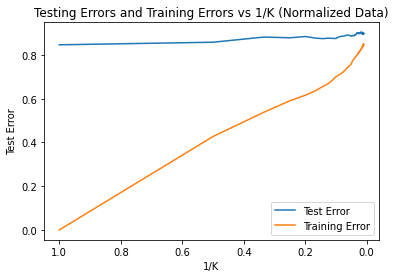

In [115]:
# Get a list of 1/K for the axis
inverseK = list(map(lambda x: 1/x, neighbors))


# Plot the testing and trainig errors vs 1/K
plt.plot(inverseK, testingErrors, label='Test Error')
plt.plot(inverseK, trainingErrors, label='Training Error')
plt.gca().invert_xaxis()
plt.title('Testing Errors and Training Errors vs 1/K (Normalized Data)')
plt.xlabel('1/K')
plt.ylabel('Test Error')
plt.legend()

For this model I utilized Min Max Scaler to normalize the data and the results for the testing and training errors were similar to the KNN model without data normalization. 

(j) Compare the results of KNN Regression with the linear regression model that has
the smallest test error and provide your analysis.

- Linear Regression: We can see from the testing MSEs from both regression models above that the model with the interaction terms got 17.52. That is lower compared to the model that only had the predictors. In addition, the model with the interaction terms and the squared predictors had a higher R-Squared value. We can conclude that this was the model tried that worked the best with the data. 

- K Nearest Neighbors: We can see for both models that test errors are pretty high (above 0.8). This means that the classifier learned on the training set is not expressive enough to account for the data in the dataset meaning the model is underfit. We can see from part (h) that as K increases the training error also increases, coming close to the testing error when K=100. For both models the best K=1.  

Comparing both models, we can see that the regression model with the interaction coefficients and the squared terms (with the insignificant ones removed) had the best results.

2. ISLR: 2.4.1: For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

    (a) The sample size n is extremely large, and the number of predictors p is small.
    
    A flexible model with very few predictors would be better than an inflexible method for a sample size n that is extremely large. This is because a flexible method would reduce teh risk of overfitting the model. Furthermore, a more flexible method could help to find a nonlinear relationship and reduce bias. 

    (b) The number of predictors p is extremely large, and the number of observations n is small.
    
    An inflexible model will perform better in general. A felxible model will cause overfitting because of the small smaple size. This leads to a bigger increase in variance and a small reduction in bias. 

    (c) The relationship between the predictors and response is highly non-linear.
    
    Generally, a flexible model will perform better becuase it'll be necessary to use a flexible model to find the non-linear effect.

    (d) The variance of the error terms, i.e. σ2 = Var(ϵ), is extremely high.

    An inflexible model should be better becuase a flexible model will capture too much of the noise in the data due to the large variance of the errors.

3. ISLR: 2.4.7 The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.
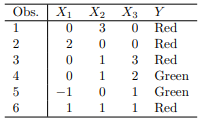
Suppose we wish to use this data set to make a prediction for Y when
X1 = X2 = X3 = 0 using K-nearest neighbors.

    (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.
    
    Euclidean Distances for:
        obs1 = sqrt(3^2) = 3
        obs2 = sqrt(2^2) = 2
        obs3 = sqrt(1^1 + 3^2) = 3.162
        obs4 = sqrt(1^2 + 2^2) = 2.236
        obs5 = sqrt(-1^2 + 1^2) = 1.414
        obs6 = sqrt(1^2 + 1^2 + 1^2) = 1.732

    (b) What is our prediction with K = 1? Why?
    
    The prediction with K=1 is green. This is because the first nearest neightbor is obs5 (smallest distance of ~1.4) is green. 

    (c) What is our prediction with K = 3? Why?
    
    The prediction with K=3 is red. This is because 2 of the 3 closest neighbors (2 and 6) are red. 

    (d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?
    
    Since a smaller K value leads to an increased flexibility and is more capable of accomodating a non-linear Bayes decision boundary, we can expect the best value of K to be small. 